In [2]:
# Import the libraries we will be using
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial import distance
from sklearn.preprocessing import Imputer

%matplotlib inline
import matplotlib.pylab as plt
plt.rcParams['figure.figsize'] = 10, 8

In [3]:
data = pd.read_csv("Data/crime2.csv")

In [4]:
#data = data.drop([0])
#'ROBBERIES','MURDER','GRAND LARCENY OF MOTOR VEHICLE', 'GRAND LARCENY','BURGLARY','FELONY ASSAULT', 'Total Crime',
data = data.drop(['Geo_FIPS','crime_classification', 'MURDER','GRAND LARCENY OF MOTOR VEHICLE','Subway Stations','Total Population', 'GRAND LARCENY','BURGLARY','FELONY ASSAULT', 'Total Crime'],axis=1)

In [5]:
data = data[data.columns[0:2]]
data

,ROBBERIES,Population Density (per sq. mile)
0,1,15072.29000
1,7,27633.55000
2,11,15169.88000
3,13,27844.51000
4,22,4037.07200
5,11,55366.08000
6,8,115769.20000
7,0,0.00000
8,5,103665.30000
9,6,98814.55000


In [6]:
data = data.drop([2149,1433,1419,1391,1018,991,649])

In [7]:
#normalize the data
cols = list(data.columns)
for col in cols:
    col_zscore = col + '_zscore'
    data[col_zscore] = (data[col] - data[col].mean())/(data[col].std(ddof=0))

In [8]:
data=data[data.columns[2:]]

In [9]:
data

,ROBBERIES_zscore,Population Density (per sq. mile)_zscore
0,-0.686235,-0.975278
1,0.243378,-0.620367
2,0.863120,-0.972520
3,1.172991,-0.614407
4,2.567411,-1.287071
5,0.863120,0.163198
6,0.398313,1.869849
7,-0.841171,-1.401135
8,-0.066493,1.527861
9,0.088442,1.390806


In [10]:
data=data.fillna(0)

In [11]:
k_clusters = 3

model = KMeans(init='k-means++', n_clusters=k_clusters, n_init=10, max_iter=100)
model.fit(data)
clusters = model.predict(data)

# Do some messy stuff to print a nice table of clusters
cluster_listing = {}
for cluster in range(k_clusters):
    cluster_listing['Cluster ' + str(cluster)] = [''] * 109
    where_in_cluster = np.where(clusters == cluster)[0]
    cluster_listing['Cluster ' + str(cluster)][0:len(where_in_cluster)] = data.index[where_in_cluster]

# Print clusters
#pd.DataFrame(cluster_listing).loc[0:np.max(np.bincount(clusters)) - 1,:]

#to make array size equal
clustered_data = pd.DataFrame({k : pd.Series(v) for k, v in cluster_listing.iteritems()})


In [ ]:
clustered_data

In [12]:
#Understanding the cluster
pd.set_option('display.max_columns', None)
cluster0 = clustered_data["Cluster 0"].tolist()
outputcluster0 = data.loc[cluster0]
outputcluster0
output_data = outputcluster0.describe().transpose()
sum_data = outputcluster0.sum()
output_data
#sum_data

,count,mean,std,min,25%,50%,75%,max
ROBBERIES_zscore,1465,-0.408197,0.447025,-0.841171,-0.841171,-0.531300,-0.221429,1.018056
Population Density (per sq. mile)_zscore,1465,-0.483623,0.500214,-1.401135,-0.859657,-0.508269,-0.107766,0.690870


In [13]:
cluster1 = clustered_data["Cluster 1"].tolist()
outputcluster1 = data.loc[cluster1]
outputcluster1
output_data = outputcluster1.describe().transpose()
sum_data = outputcluster1.sum()
output_data

#sum_data

,count,mean,std,min,25%,50%,75%,max
ROBBERIES_zscore,258,2.031142,1.189105,0.708185,1.327927,1.792733,2.412476,12.01848
Population Density (per sq. mile)_zscore,258,0.260570,0.880442,-1.401135,-0.331564,0.192606,0.747690,4.13026


In [14]:
cluster2 = clustered_data["Cluster 2"].tolist()
outputcluster2 = data.loc[cluster2]
outputcluster2
sum_data = outputcluster2.sum()
output_data = outputcluster2.describe().transpose()
output_data
#sum_data

,count,mean,std,min,25%,50%,75%,max
ROBBERIES_zscore,437,0.169278,0.647931,-0.841171,-0.376364,0.088442,0.553249,2.257540
Population Density (per sq. mile)_zscore,437,1.467461,0.817308,0.327560,0.849900,1.285510,1.873488,4.860918


In [15]:
#data =data.drop(["crime_classification"])
data = data.as_matrix()
data

array([[-0.68623537, -0.97527753],
       [ 0.24337793, -0.62036719],
       [ 0.86312012, -0.97252019],
       ..., 
       [ 0.39831347, -0.92541876],
       [-0.84117092, -1.37962052],
       [-0.84117092, -1.40113542]])

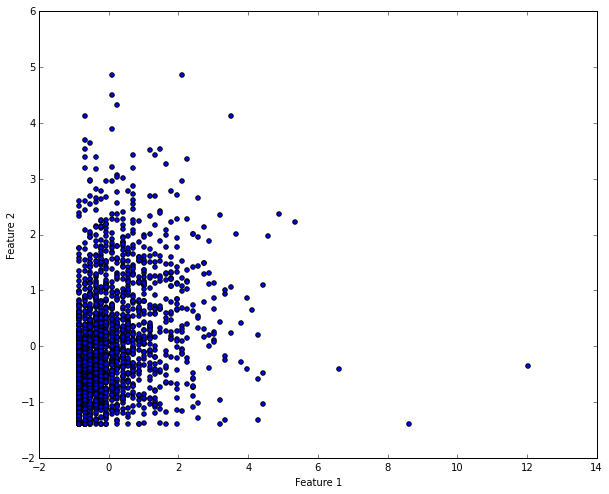

In [17]:
#plot the data
plt.scatter(data[:,0],data[:, 1])
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [18]:
def colorizer(Y):
    pal = ["#50514f", "#f25f5c", "#ffe066", "#247ba0", "#70c1b3"]
    pal = ["#DC3522", "#4C1B1B", "#FF358B", "#044C29", "#1E1E20", "#225378", "#1695A3", "#EB7F00"] * 3
    colors = np.array(Y, dtype="object")

    for i, color in enumerate(np.unique(Y)):
        colors[colors == color] = pal[i]

    return list(colors)

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


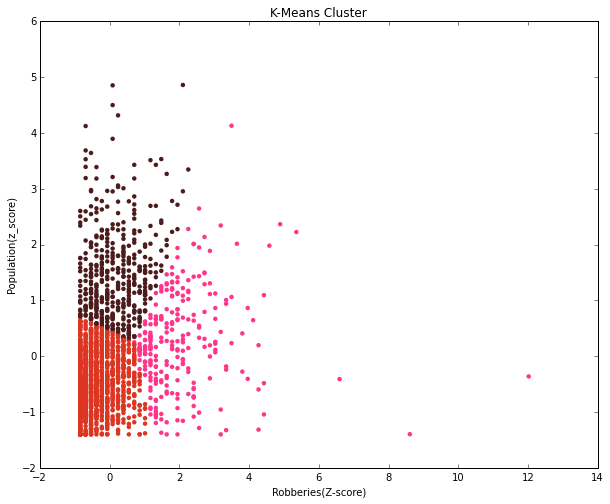

In [19]:
model = KMeans(3)
model.fit(data)
clusters = model.predict(data)
plt.scatter(data[:,0], data[:, 1], color=colorizer(clusters), linewidth=0, s=20)
plt.xlabel("Robberies(Z-score)")
plt.ylabel("Population(z_score)")
plt.savefig("Data/kmeans-cluster.png")
plt.title("K-Means Cluster")
plt.legend(loc='upper left')
plt.show()

In [ ]:
# New column into database
data['crime_classification']=''

In [ ]:
for value in cluster0:
    data.set_value(value, 'crime_classification', 'low')

In [ ]:
data.to_csv('Data/Robberies_Clustered.csv')